# 0. Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Leitura

In [2]:
# Importação dos dados

df_dadoscomerciais = pd.read_csv('../../data/external/ANEEL/dados_comerciais/indger-dados-comerciais.csv', sep=";", encoding='latin1')
df_municipios = pd.read_excel('../../data/external/IBGE/RELATORIO_DTB_BRASIL_MUNICIPIO.xlsx')

# 2. Processamento

## 2.1. Tipagem e características da tabela

In [3]:
# Análise inicial da base de dados da ANEEL

df_dadoscomerciais.head()

,DatGeracaoConjuntoDados,NumCNPJ,SigAgente,NomAgente,NomTipoOutorga,DatReferenciaInformada,CodMunicipioIBGE,QtdUCAtiva,QtdUCAtivaFat,QtdFatura,...,QtdInspecVerifProcIrregular,QtdTermosOcorrInspecao,QtdTermosOcorrInspecaoCobr,QtdTermosOcorrInspecaoEncerr,QtdProceCobrDefMedidor,QtdReligCobr,QtdUCSuspInadimplemento,QtdSuspIndev,VlrTotCompSuspIndevida,DthCarga
0,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-02-01,4202800,239,239,239,...,0,0,0,0,0,0,0,0,",000000000",2024-08-04 04:01:22.983000000
1,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-01-01,4214904,108,108,108,...,0,0,0,0,0,0,0,0,",000000000",2024-08-04 04:01:22.983000000
2,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-01-01,4206108,3642,3630,3634,...,0,0,0,0,0,0,21,21,",000000000",2024-08-04 04:01:22.983000000
3,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-01-01,4202800,239,239,239,...,0,0,0,0,0,0,0,0,",000000000",2024-08-04 04:01:22.983000000
4,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2023-12-01,4214904,108,108,109,...,0,0,0,0,0,0,0,0,",000000000",2024-08-04 04:01:22.983000000


In [4]:
pd.set_option('display.max_rows', None)

print(f"""Tipo de dados:
{df_dadoscomerciais.dtypes}

Colunas:
{df_dadoscomerciais.columns}

Formato:
{df_dadoscomerciais.shape[0]} Linhas e {df_dadoscomerciais.shape[0]} Colunas

Nulos:
{df_dadoscomerciais.isnull().sum()}
""")

Tipo de dados:
DatGeracaoConjuntoDados          object
NumCNPJ                           int64
SigAgente                        object
NomAgente                        object
NomTipoOutorga                   object
DatReferenciaInformada           object
CodMunicipioIBGE                  int64
QtdUCAtiva                        int64
QtdUCAtivaFat                     int64
QtdFatura                         int64
QtdFaturaSemLeitura               int64
QtdFaturaSemLeituraImpAcesso      int64
QtdFaturaSemLeituraEmergencia     int64
QtdFaturaSemLeituraPlurimensa     int64
QtdFaturaSemLeituraFatEstimad     int64
QtdFaturaSemLeituraFimContrat     int64
QtdFaturaSemLeituraAusenciaTm     int64
QtdRefaturamento                  int64
QtdFaturaAcerto                   int64
QtdFaturaAcertoFatIncorreto       int64
QtdFaturaAcertoFatIncorDevDob     int64
QtdFaturaAcertoFatIncorDevSEC     int64
QtdFaturaAcertoFatIncorDevSET     int64
QtdFaturaAcertoFatImpAcesso       int64
QtdFaturaAcertoFatEmergen

In [5]:
# Corrigindo os tipos de dado.

pd.reset_option('display.max_rows')


string_cols = ['SigAgente', 'NomAgente', 'NomTipoOutorga']
float_cols = ['VlrRestAnte', 'VlrRestAtrasado', 'VlrRestPendente', 'VlrRestPendenteAtrasado','VlrPendentePgtRessarcDanoDefe',
              'VlrPagoRessarcDano', 'MdaTempoMedAtendimentoPosto', 'MdaTempoMedAtendPostoDiaFort', 'VlrTotCompSuspIndevida']
dt_cols = ['DatGeracaoConjuntoDados', 'DatReferenciaInformada', 'DthCarga']

df_dadoscomerciais[float_cols] = df_dadoscomerciais[float_cols].replace({",":"."}, regex=True)

df_dadoscomerciais[string_cols] = df_dadoscomerciais[string_cols].astype(str)
df_dadoscomerciais[float_cols] = df_dadoscomerciais[float_cols].astype(float)
df_dadoscomerciais[dt_cols] = df_dadoscomerciais[dt_cols].apply(pd.to_datetime)



In [6]:
# Análise inicial da base de dados do IBGE.


df_municipios.head()

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [7]:
municipios_cols = ['UF', 'Nome_UF', 'Município', 'Código Município Completo', 'Nome_Município']
df_municipios_filter = df_municipios[municipios_cols]
print(f"""Tipo de dados:
{df_municipios_filter.dtypes}

Colunas:
{df_municipios_filter.columns}

Formato:
{df_municipios_filter.shape[0]} Linhas e {df_municipios_filter.shape[0]} Colunas

Nulos:
{df_municipios_filter.isnull().sum()}

""")

Tipo de dados:
UF                            int64
Nome_UF                      object
Município                     int64
Código Município Completo     int64
Nome_Município               object
dtype: object

Colunas:
Index(['UF', 'Nome_UF', 'Município', 'Código Município Completo',
       'Nome_Município'],
      dtype='object')

Formato:
5570 Linhas e 5570 Colunas

Nulos:
UF                           0
Nome_UF                      0
Município                    0
Código Município Completo    0
Nome_Município               0
dtype: int64




In [8]:
# Corrigindo os tipos dos dados 

municipios_str_cols = ['Nome_UF', 'Nome_Município']
df_municipios_filter.loc[:, municipios_str_cols] = df_municipios_filter[municipios_str_cols].astype(str)


## 2.2. Cruzamento das Tabelas

In [9]:
#Realizando o cruzamento das tabelas para obter as informações dos municípios.

df_dadoscomerciais_merge = df_dadoscomerciais.merge(df_municipios_filter,
                                                    how = 'left',
                                                    left_on = 'CodMunicipioIBGE',
                                                    right_on ='Código Município Completo',
                                                    )

df_dadoscomerciais_merge


,DatGeracaoConjuntoDados,NumCNPJ,SigAgente,NomAgente,NomTipoOutorga,DatReferenciaInformada,CodMunicipioIBGE,QtdUCAtiva,QtdUCAtivaFat,QtdFatura,...,QtdReligCobr,QtdUCSuspInadimplemento,QtdSuspIndev,VlrTotCompSuspIndevida,DthCarga,UF,Nome_UF,Município,Código Município Completo,Nome_Município
0,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-02-01,4202800,239,239,239,...,0,0,0,0.0,2024-08-04 04:01:22.983,42,Santa Catarina,2800,4202800,Braço do Norte
1,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-01-01,4214904,108,108,108,...,0,0,0,0.0,2024-08-04 04:01:22.983,42,Santa Catarina,14904,4214904,Rio Fortuna
2,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-01-01,4206108,3642,3630,3634,...,0,21,21,0.0,2024-08-04 04:01:22.983,42,Santa Catarina,6108,4206108,Grão-Pará
3,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2024-01-01,4202800,239,239,239,...,0,0,0,0.0,2024-08-04 04:01:22.983,42,Santa Catarina,2800,4202800,Braço do Norte
4,2024-08-05,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,Permissão,2023-12-01,4214904,108,108,109,...,0,0,0,0.0,2024-08-04 04:01:22.983,42,Santa Catarina,14904,4214904,Rio Fortuna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110126,2024-08-05,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,Permissão,2023-08-01,4321808,1961,1956,1957,...,3,9,9,0.0,2024-08-04 04:01:22.613,43,Rio Grande do Sul,21808,4321808,Três de Maio
110127,2024-08-05,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,Permissão,2023-08-01,4319737,1,1,1,...,0,0,0,0.0,2024-08-04 04:01:22.613,43,Rio Grande do Sul,19737,4319737,São Valério do Sul
110128,2024-08-05,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,Permissão,2023-08-01,4319109,42,41,41,...,0,1,1,0.0,2024-08-04 04:01:22.613,43,Rio Grande do Sul,19109,4319109,São Martinho
110129,2024-08-05,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,Permissão,2023-08-01,4318499,165,164,164,...,0,0,0,0.0,2024-08-04 04:01:22.613,43,Rio Grande do Sul,18499,4318499,São José do Inhacorá


In [10]:
# Aqui estamos realizando um filtro para manter somente as colunas relevantes para nossa análise.

df_dadoscomerciais_merge_final = df_dadoscomerciais_merge[['NumCNPJ',
                                                            'SigAgente',
                                                            'NomAgente',
                                                            'DatReferenciaInformada',
                                                            'CodMunicipioIBGE', 
                                                            'UF',
                                                            'Nome_UF',
                                                            'Nome_Município',
                                                            ]]
df_dadoscomerciais_merge_final

,NumCNPJ,SigAgente,NomAgente,DatReferenciaInformada,CodMunicipioIBGE,UF,Nome_UF,Nome_Município
0,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,2024-02-01,4202800,42,Santa Catarina,Braço do Norte
1,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,2024-01-01,4214904,42,Santa Catarina,Rio Fortuna
2,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,2024-01-01,4206108,42,Santa Catarina,Grão-Pará
3,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,2024-01-01,4202800,42,Santa Catarina,Braço do Norte
4,1229747000189,Cergapa,COOPERATIVA DE ELETRICIDADE DE GRÃO PARÁ,2023-12-01,4214904,42,Santa Catarina,Rio Fortuna
...,...,...,...,...,...,...,...,...
110126,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,2023-08-01,4321808,43,Rio Grande do Sul,Três de Maio
110127,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,2023-08-01,4319737,43,Rio Grande do Sul,São Valério do Sul
110128,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,2023-08-01,4319109,43,Rio Grande do Sul,São Martinho
110129,98042963000152,Certhil,COOPERATIVA DE DISTRIBUIÇÃO DE ENERGIA ENTRE R...,2023-08-01,4318499,43,Rio Grande do Sul,São José do Inhacorá


## 2.3. Concessionárias por UF


In [11]:
# Realizando uma agregação para por UF e Concessionária para uma sumarização.

df_concessionarias_por_uf = df_dadoscomerciais_merge_final.groupby(['Nome_UF', 'UF', 'SigAgente', 'NumCNPJ']).agg(UltimoRegistro=('DatReferenciaInformada', 'max')).reset_index()
df_concessionarias_por_uf.head()




,Nome_UF,UF,SigAgente,NumCNPJ,UltimoRegistro
0,Acre,12,Energisa AC,4065033000170,2024-06-01
1,Alagoas,27,Equatorial AL,12272084000100,2024-06-01
2,Alagoas,27,Neoenergia Coelba,15139629000194,2024-06-01
3,Alagoas,27,Neoenergia Pernambuco,10835932000108,2024-06-01
4,Amapá,16,CEA Equatorial,5965546000109,2024-06-01


In [12]:
# Realizando uma transformação para validar a última data de atuação de cada concessionária em cada estado.
# Adicionando uma nova coluna que contém a contagem do número de concessionárias por estado.

df_concessionarias_por_uf["DataMax"] = df_concessionarias_por_uf.groupby("SigAgente")["UltimoRegistro"].transform("max")
df_concessionarias_por_uf = df_concessionarias_por_uf[
    df_concessionarias_por_uf["UltimoRegistro"] == df_concessionarias_por_uf["DataMax"]
]
df_concessionarias_por_uf["Quantidade_Concessionárias_UF"] = df_concessionarias_por_uf.groupby("Nome_UF")["SigAgente"].transform("count")



In [13]:
# Removendo a coluna redundante.

df_concessionarias_por_uf = df_concessionarias_por_uf.drop("DataMax", axis=1)
df_concessionarias_por_uf.head()

,Nome_UF,UF,SigAgente,NumCNPJ,UltimoRegistro,Quantidade_Concessionárias_UF
0,Acre,12,Energisa AC,4065033000170,2024-06-01,1
1,Alagoas,27,Equatorial AL,12272084000100,2024-06-01,3
2,Alagoas,27,Neoenergia Coelba,15139629000194,2024-06-01,3
3,Alagoas,27,Neoenergia Pernambuco,10835932000108,2024-06-01,3
4,Amapá,16,CEA Equatorial,5965546000109,2024-06-01,1


## 2.4. Concessionárias por Município

In [14]:
# Realizando uma agregação para por Município e Concessionária para uma sumarização.


df_concessionarias_por_municipio = df_dadoscomerciais_merge_final.groupby(['Nome_Município', 'SigAgente', 'NumCNPJ']).agg(UltimoRegistro=('DatReferenciaInformada', 'max')).reset_index()


In [15]:
# Realizando uma transformação para validação sobre a última data de atuação da Concessionária em cada município.


df_concessionarias_por_municipio["DataMax"] = df_concessionarias_por_municipio.groupby("SigAgente")["UltimoRegistro"].transform("max")
df_concessionarias_por_municipio = df_concessionarias_por_municipio[
    df_concessionarias_por_municipio["UltimoRegistro"] == df_concessionarias_por_municipio["DataMax"]
]
df_concessionarias_por_municipio["Quantidade_Concessionárias_Município"] = df_concessionarias_por_municipio.groupby("Nome_Município")["SigAgente"].transform("count")



In [16]:
# Removendo a coluna redundante.

df_concessionarias_por_municipio = df_concessionarias_por_municipio.drop("DataMax", axis=1)
df_concessionarias_por_municipio.head()

,Nome_Município,SigAgente,NumCNPJ,UltimoRegistro,Quantidade_Concessionárias_Município
0,Abadia de Goiás,Enel GO,1543032000104,2024-06-01,1
1,Abadia dos Dourados,Cemig-D,6981180000116,2024-06-01,1
2,Abadiânia,Enel GO,1543032000104,2024-06-01,1
3,Abaetetuba,Equatorial PA,4895728000180,2024-06-01,1
4,Abaeté,Cemig-D,6981180000116,2024-06-01,1


# 3. Visualização 

(0.0, 30.0)

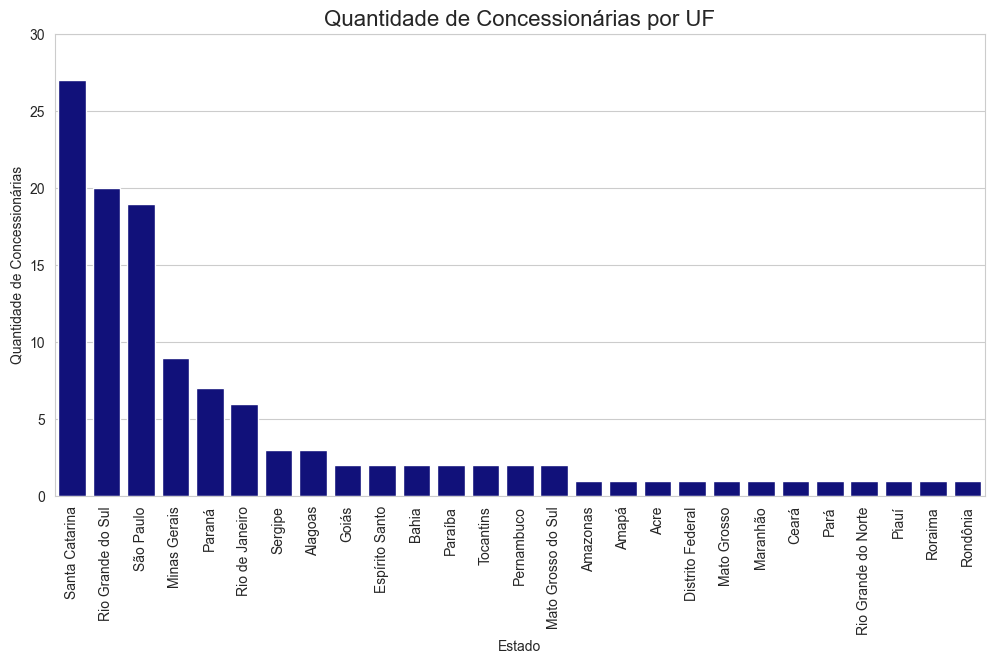

In [17]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=df_concessionarias_por_uf,
              x="Nome_UF",
              y="Quantidade_Concessionárias_UF",
              color="Darkblue",
              order = df_concessionarias_por_uf['Nome_UF'].value_counts().index
              
)
plt.title("Quantidade de Concessionárias por UF", fontsize = 16)
plt.xlabel("Estado")
plt.ylabel("Quantidade de Concessionárias")
plt.xticks(rotation=90);
plt.ylim(0,30)



In [18]:
# Quantidade de Concessionárias por estado em forma de tabela.

sumarizacao_uf = (df_concessionarias_por_uf[["Nome_UF", "Quantidade_Concessionárias_UF"]]
        .drop_duplicates().
        sort_values(by="Quantidade_Concessionárias_UF", ascending=False)
        .reset_index(drop=True))
sumarizacao_uf



,Nome_UF,Quantidade_Concessionárias_UF
0,Santa Catarina,27
1,Rio Grande do Sul,20
2,São Paulo,19
3,Minas Gerais,9
4,Paraná,7
5,Rio de Janeiro,6
6,Sergipe,3
7,Alagoas,3
8,Goiás,2
9,Espírito Santo,2


In [19]:
# Dados estatísticos sobre as informações obtidas.

sumarizacao_uf.describe()


,Quantidade_Concessionárias_UF
count,27.000000
mean,4.444444
std,6.738713
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,27.000000


# 6. Salvando os Arquivos

In [20]:
df_concessionarias_por_uf.to_csv('../../data/processed/ANEEL/df_concessionarias_por_uf.csv')
df_concessionarias_por_municipio.to_csv('../../data/processed/ANEEL/df_concessionarias_por_municipio.csv')